# Νευρωνικά Δίκτυα & Ευφυή Υπολογιστικά Συστήματα:  Άσκηση 1

##Α. Στοιχεία ομάδας
Αριθμός: 15 <br>
S02: [Planning Relax Data Set](https://http://archive.ics.uci.edu/ml/datasets/Planning+Relax) <br>
<br>
Mέλη: <br>
Διολέτη	Ίλια 	03115055 <br>
Κυριάκου 	Αθηνά 	03117405  <br>
Σουμπασάκου	Αρτεμησία	03115061


##Β. Dataset

### **Περιγραφή**
Στα ηλεκτροεγκεφαλογραφήματα (EEG) περιέχονται ταλαντώσεις που θεωρείται πως αντιστοιχούν στην συγχρονισμένη δραστηριότητα ομάδων νευρώνων. Αυτή η δραστηριότητα ανάλογα με τη συχνότητά της χαρακτηρίζεται ως Delta (0.5-4 Hz), Theta (4-8 Hz), Alpha (8-13 Hz), Beta (13-22 Hz), και Gamma (30-40 Hz). Για συχνότητες από 7-13 hz μιλάμε επίσης για mu ρυθμό που παρατηρείται κυρίως όταν το άτομο βρίσκεται σε ανάπαυση ή πριν ξεκινήσει κάποια κίνηση.

Το Planning Relax Data Set περιέχει EEG δεδομένα που συγκεντρώθηκαν 5 φορές από ένα υγιές άτομο, δεξιόχειρα , 25 ετών. Του ζητήθηκε να ξαπλώσει σε μια αναπαυτική θέση με κλειστά μάτια και ελάχιστες κινήσεις ματιών. Έτσι έγιναν μετρήσεις στην θέση χαλάρωσης αλλά και αφού ζητήθηκε στο άτομο να φανταστεί πως σηκώνει κάποια δάχτυλα( οπότε καμία πραγματική κίνηση δεν πραγματοποιήθηκε).

Το σύνολο δεδομένων αφορά στην ταξινόμηση δύο διανοητικών φάσεων:
*   φάση σχεδιασμού
*   φάση χαλάρωσης


Έχουμε **182 δείγματα** με **13 χαρακτηριστικά** το καθένα. Έχουμε **δύο κλάσεις (1 και 2)** που αντιπροσωπεύουν αντίστοιχα τις 2 κλάσεις που περιγράφονται παραπάνω.

### **Εισαγωγή**


In [ ]:
# package upgrades
!pip install --upgrade pip
!pip install scikit-learn --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade

from google.colab import files
from google.colab import drive

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving plrx.txt to plrx (6).txt


Γίνεται μετατροπή του αρχείου txt σε csv:

In [ ]:
with open('plrx.txt') as infile, open('plrx.csv', 'w') as outfile:
    stripped = (line.strip() for line in infile)
    for line in stripped:
        outfile.write(" ".join(line.split()).replace(' ', ','))
        outfile.write(",")
        outfile.write("\n")


In [ ]:
import pandas as pd
df=pd.read_csv("plrx.csv", header=None)   #first line contains data and not column names

### **Επισκόπηση**

In [ ]:
print(df.shape)
print(df)
print(df.dtypes)

(182, 14)
          0         1         2         3   ...        10        11   12  13
0   -0.17936 -0.207000 -0.209710 -0.097260  ...  0.003383 -0.334250  1.0 NaN
1   -0.14659 -0.164940  0.249870 -0.073985  ... -0.017511  0.066959  1.0 NaN
2   -0.13131  0.518160  0.432810  0.397890  ...  0.088057  0.631200  2.0 NaN
3    0.64940  0.418780  0.148350  0.333490  ...  0.364680  0.571720  1.0 NaN
4   -0.40628  0.115030  0.073336  0.070066  ... -0.126950  0.184570  1.0 NaN
..       ...       ...       ...       ...  ...       ...       ...  ...  ..
177 -0.55005  0.276290 -0.273240  0.113190  ...  0.002273 -0.100480  2.0 NaN
178 -0.78399  0.254600 -0.700990 -0.299170  ... -0.020915  0.663940  1.0 NaN
179  0.29877 -0.179620  0.032859 -0.899010  ...  0.246830 -0.389160  2.0 NaN
180 -0.37812 -0.522870  0.215410 -0.243590  ...  0.007591  0.476030  1.0 NaN
181  0.37913 -0.046562 -0.123360 -0.063958  ...  0.173690  0.490630  2.0 NaN

[182 rows x 14 columns]
0     float64
1     float64
2     float64

Με μία σύντομη επισκόπηση του dataset παρατηρούμε ότι:

*  δεν υπάρχουν **indexes** γραμμών και στηλών
*  δεν περιλαμβάνονται **επικεφαλίδες** γραμμών και στηλών
* δεν υπάρχουν **ετικέτες** για τις κλάσεις
*  ο **τύπος δεδομένων** είναι αριθμοί κινητής υποδιαστολής
* τα δείγματα **δεν** είναι **διατεταγμένα**, δηλαδή δεν έχει σημασία η σειρά τους
* τα δείγματα είναι σε γραμμές και τα χαρακτηριστικά σε στήλες (συμβατότητα με το scikit-learn)
* υπάρχει μία επιπλέον στήλη (13) που προέκυψε από την μετατροπή του αρχείου δεδομένων σε csv, η οποία θα αφαιρεθεί


**Απουσιάζουσες τιμές** εκτός της κολόνας 13 δεν υπάρχουν, όπως αναφέρεται στην περιγραφή του dataset.

In [ ]:
import numpy as np
np_data=df.values #direct conversion to numpy array since all the data are float numbers
features=np_data[:, 0:-2]
labels = np_data[:,-2].astype(int)
frequencies = np.bincount(labels)
print("class frequencies: ", frequencies)
total_samples = frequencies.sum()
print("total samples: ", total_samples)
percentage = (frequencies / total_samples) * 100
print("class percentage: ", percentage)

class frequencies:  [  0 130  52]
total samples:  182
class percentage:  [ 0.         71.42857143 28.57142857]


Το dataset **δεν είναι ισορροπημένο** αφού το

1.   List item
2.   List item

71.4% των δειγμάτων ανήκουν στην κλάση 1 και το 28.6% στην κλάση 2.

### **Διαχωρισμός σε train και test set**

In [ ]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2) #20% test set

##Γ. Baseline classification

In [ ]:
from sklearn.dummy import DummyClassifier

comp_df_data = {'Classifier':[],
        'F1 Micro (before)':[],
        'F1 Micro (after)':[],
        'F1 Macro (before)':[],
        'F1 Macro (after)':[]}

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

plrx_accuracy = {}
cnf_matrix={}
fmicro={}
fmacro={}

def get_scores(classifier, prediction):
  plrx_accuracy[classifier] = accuracy_score(test_labels, prediction)
  cnf_matrix[classifier] = confusion_matrix(test_labels, prediction)
  fmicro[classifier]=precision_recall_fscore_support(test_labels, prediction, average='micro')
  fmacro[classifier]=precision_recall_fscore_support(test_labels, prediction, average='macro')

# training the classifiers with default values
model = dc_uniform.fit(train, train_labels)
pred= dc_uniform.predict(test)
get_scores('uniform (random)', pred)

model = dc_constant_1.fit(train, train_labels)
pred= dc_constant_1.predict(test)
get_scores('constant 1', pred)

model = dc_constant_2.fit(train, train_labels)
pred= dc_constant_2.predict(test)
get_scores('constant 2', pred)

model = dc_most_frequent.fit(train, train_labels)
pred=dc_most_frequent.predict(test)
get_scores('most frequent label', pred)

model = dc_stratified.fit(train, train_labels)
pred = dc_stratified.predict(test)
get_scores('stratified', pred)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #default k = 5
knn.fit(train, train_labels)
pred = knn.predict(test)
get_scores('knn', pred)

# printing the metrics for each estimator
print("Confusion matrix:\n")
for k in cnf_matrix:
  print(k, "\n", cnf_matrix[k])
print("\n")
print("Micro Average (Precision,Recall,F1):\n")
for k in fmicro:
  print(k, fmicro[k])
  comp_df_data['Classifier'].append(k)
  comp_df_data['F1 Micro (before)'].append(fmicro[k][2])
print("\n")
print("Macro Average (Precision,Recall,F1):\n")
for k in fmacro:
  print(k, fmacro[k])
  comp_df_data['F1 Macro (before)'].append(fmacro[k][2])
print("\n")


Confusion matrix:

uniform (random) 
 [[13 15]
 [ 4  5]]
constant 1 
 [[28  0]
 [ 9  0]]
constant 2 
 [[ 0 28]
 [ 0  9]]
most frequent label 
 [[28  0]
 [ 9  0]]
stratified 
 [[21  7]
 [ 5  4]]
knn 
 [[20  8]
 [ 9  0]]


Micro Average (Precision,Recall,F1):

uniform (random) (0.4864864864864865, 0.4864864864864865, 0.4864864864864865, None)
constant 1 (0.7567567567567568, 0.7567567567567568, 0.7567567567567567, None)
constant 2 (0.24324324324324326, 0.24324324324324326, 0.24324324324324326, None)
most frequent label (0.7567567567567568, 0.7567567567567568, 0.7567567567567567, None)
stratified (0.6756756756756757, 0.6756756756756757, 0.6756756756756757, None)
knn (0.5405405405405406, 0.5405405405405406, 0.5405405405405406, None)


Macro Average (Precision,Recall,F1):

uniform (random) (0.5073529411764706, 0.5099206349206349, 0.46130268199233715, None)
constant 1 (0.3783783783783784, 0.5, 0.4307692307692308, None)
constant 2 (0.12162162162162163, 0.5, 0.1956521739130435, None)
most frequ

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Average Metrics Bar Plots**

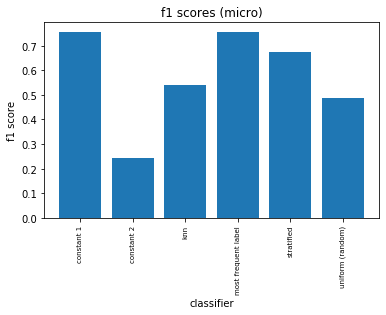

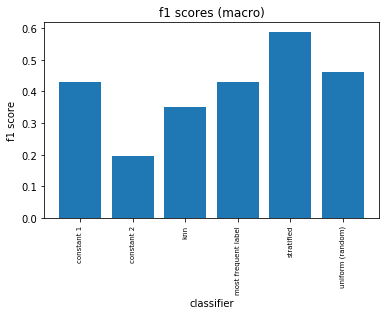

In [ ]:
# creating bar plots for f1 micro and f1 macro for all the classifiers
%matplotlib inline
import matplotlib.pyplot as plt
def plot_bar_chart(label_to_value, title, x_label, y_label, index): #from https://www.programcreek.com/python/example/102292/matplotlib.pyplot.bar
    n = len(label_to_value)
    labels = sorted(label_to_value.keys())
    values = [(label_to_value[label])[index] for label in labels]
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.bar(range(n), values, align='center')
    plt.xticks(range(n), labels, rotation='vertical', fontsize='7')
    plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels
    plt.show()

plot_bar_chart(fmicro, 'f1 scores (micro)', 'classifier', 'f1 score', 2)
plot_bar_chart(fmacro, 'f1 scores (macro)', 'classifier', 'f1 score', 2)

### **Σχολιασμός**

Πριν σχολιαστούν τα παραπάνω αποτελέσματα, θα πρέπει να σημειωθεί ότι οι τιμές επηρεάζονται από εκάστοτε διαχωρισμό σε train και test set.

Παρατηρούμε ότι χειρότερες τιμές μετρικών έχει ο Constant2. Αυτό είναι λογικό, αφού ο αριθμός δειγμάτων της κλάσης 2 είναι μικρότερος (~30%).

Επίσης, παρατηρούμε ότι η απόδοση του Constant1 ταυτίζεται με του Most Frequent Label. Κάτι τέτοιο είναι αναμενόμενο επειδή η κλάση 1 είναι πιο συχνή στο train set. Η στρατηγικές αυτές έχουν συνήθως το μεγαλύτερο f1 Micro Average, ενώ άλλες φορές καλύτερες μετρική micro εμφανίζει η Stratified.

Τέλος αξίζει να σημειωθεί ότι η κατάταξη των ταξινομητών είναι η ίδια ως προς κάθε μετρική των Micro και Macro Average.



##Δ. Βελτιστοποίηση ταξινομητών

Ψαχνουμε να βελτιστοποιήσουμε την υπερπαράμετρο k του knn με δική μας υλοποίηση 10-fold cross validation, καθώς και να εντοπίσουμε την βέλτιστη αρχιτεκτονική για την προεπεξεργασία. </br>
[Οι dummy δεν έχουν παραμέτρους για βελτιστοποίηση , γίνεται όμως μια εκτίμηση της απόδοσής τους στην καλύτερη αρχιτεκτονική]


### **Υλοποίηση του Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# dataframe to compare the metrics of architecture implementations for knn classifier
knn_archcomp = pd.DataFrame(columns=['Architecture','K','Accuracy','Precision(micro avg)','Recall(micro avg)','F1(micro avg)','Precision(macro avg)','Recall(macro avg)','F1(macro avg)'])

#random oversampler
ros=RandomOverSampler()
#train_ros, trainlabels_ros=ros.fit_resample(train_scaled,train_labels)

#CROSS VALIDATION

def my_cross_val_score(classifier, cvtest, cvtest_labels ): #https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833
  cv = KFold(n_splits=10)
  score=[]
  for train_index, test_index in cv.split(cvtest):
      X_train, X_test, y_train, y_test = cvtest[train_index], cvtest[test_index], cvtest_labels[train_index], cvtest_labels[test_index]
      classifier.fit(X_train, y_train)
      score.append(classifier.score(X_test, y_test))
      return score

def knn_cross_val(cvtrain, cvtest):
  myList = list(range(1,50))
  neighbors = list(filter(lambda x: x % 2 != 0, myList))
  # empty list that will hold cv scores
  cv_scores = []
  # perform 10-fold cross validation
  for k in neighbors:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = my_cross_val_score(knn, cvtrain, train_labels)
      cv_scores.append(np.mean(scores))
  # το σφάλμα είναι το αντίστροφο της πιστότητας
  mean_error = [1 - x for x in cv_scores]
  # determining best k
  optimal_k = neighbors[mean_error.index(min(mean_error))]
  print("The optimal number of neighbors (calculated in the training set) is Κ=%d" % optimal_k)
  # για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
  knn = KNeighborsClassifier(n_neighbors = optimal_k)
  knn.fit(cvtrain, train_labels)
  pred = knn.predict(cvtest)
  get_scores('knn', pred) #cnf matrix, precision, recall , f1

  print("accuracy:\n")
  print(plrx_accuracy['knn'], "\n")
  print("Confusion matrix:\n")
  print(cnf_matrix['knn'], "\n")
  print("Micro Average (Precision,Recall,F1):\n")
  print(fmicro['knn'], "\n")
  print("Macro Average (Precision,Recall,F1):\n")
  print(fmacro['knn'], "\n")
  return optimal_k, plrx_accuracy['knn'], fmicro['knn'], fmacro['knn']

### **Χωρίς προεπεξεργασία**




In [ ]:
optimal_k, plrx_accuracy['knn'], fmicro['knn'], fmacro['knn'] = knn_cross_val(train, test)
index = 0
knn_archcomp.loc[index] = ['Without pre processing', optimal_k, plrx_accuracy['knn'], fmicro['knn'][0], fmicro['knn'][1], fmicro['knn'][2],
                           fmacro['knn'][0], fmacro['knn'][1], fmacro['knn'][2]]

The optimal number of neighbors (calculated in the training set) is Κ=13
accuracy:

0.6756756756756757 

Confusion matrix:

[[25  3]
 [ 9  0]] 

Micro Average (Precision,Recall,F1):

(0.6756756756756757, 0.6756756756756757, 0.6756756756756757, None) 

Macro Average (Precision,Recall,F1):

(0.36764705882352944, 0.44642857142857145, 0.403225806451613, None) 



### **με Variance Threshold & Standard Scaler**

In [ ]:
# αρχικοποιούμε έναν selector
selector = VarianceThreshold()
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = selector.transform(test)

#κανονικοποίηση
scaler = preprocessing.StandardScaler().fit(train_reduced)
train_scaled = scaler.transform(train_reduced)
test_scaled = scaler.transform(test_reduced)

optimal_k, plrx_accuracy['knn'], fmicro['knn'], fmacro['knn'] = knn_cross_val(train_scaled, test_scaled)
index += 1
knn_archcomp.loc[index] = ['Variance Threshold & Standard Scaler', optimal_k, plrx_accuracy['knn'], fmicro['knn'][0], fmicro['knn'][1], fmicro['knn'][2],
                           fmacro['knn'][0], fmacro['knn'][1], fmacro['knn'][2]]


The optimal number of neighbors (calculated in the training set) is Κ=1
accuracy:

0.5945945945945946 

Confusion matrix:

[[21  7]
 [ 8  1]] 

Micro Average (Precision,Recall,F1):

(0.5945945945945946, 0.5945945945945946, 0.5945945945945946, None) 

Macro Average (Precision,Recall,F1):

(0.4245689655172414, 0.4305555555555556, 0.4272445820433437, None) 



### **με Variance Threshold & MinMax Scaler**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(train)
test_minmax = min_max_scaler.transform(test)

selector = VarianceThreshold()
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = selector.transform(test)

optimal_k, plrx_accuracy['knn'], fmicro['knn'], fmacro['knn'] = knn_cross_val(train_reduced, test_reduced)
index += 1
knn_archcomp.loc[index] = ['Variance Threshold & MinMax Scaler', optimal_k, plrx_accuracy['knn'], fmicro['knn'][0], fmicro['knn'][1], fmicro['knn'][2],
                           fmacro['knn'][0], fmacro['knn'][1], fmacro['knn'][2]]

The optimal number of neighbors (calculated in the training set) is Κ=13
accuracy:

0.6756756756756757 

Confusion matrix:

[[25  3]
 [ 9  0]] 

Micro Average (Precision,Recall,F1):

(0.6756756756756757, 0.6756756756756757, 0.6756756756756757, None) 

Macro Average (Precision,Recall,F1):

(0.36764705882352944, 0.44642857142857145, 0.403225806451613, None) 



### **με PCA**

In [ ]:
#pca
pca=PCA().fit(train)
train_pca=pca.fit_transform(train)

optimal_k, plrx_accuracy['knn'], fmicro['knn'], fmacro['knn'] = knn_cross_val(train_pca, test)
index += 1
knn_archcomp.loc[index] = ['PCA', optimal_k, plrx_accuracy['knn'], fmicro['knn'][0], fmicro['knn'][1], fmicro['knn'][2],
                           fmacro['knn'][0], fmacro['knn'][1], fmacro['knn'][2]]

The optimal number of neighbors (calculated in the training set) is Κ=13
accuracy:

0.7297297297297297 

Confusion matrix:

[[26  2]
 [ 8  1]] 

Micro Average (Precision,Recall,F1):

(0.7297297297297297, 0.7297297297297297, 0.7297297297297297, None) 

Macro Average (Precision,Recall,F1):

(0.5490196078431372, 0.5198412698412699, 0.5026881720430108, None) 



### **Συγκριτικός πίνακας αρχιτεκτονικών προεπεξεργασίας δεδομένων για τον kNN ταξινομητή και επιλογή βέλτιστης**


In [ ]:
knn_archcomp

,Architecture,K,Accuracy,Precision(micro avg),Recall(micro avg),F1(micro avg),Precision(macro avg),Recall(macro avg),F1(macro avg)
0,Without pre processing,13,0.675676,0.675676,0.675676,0.675676,0.367647,0.446429,0.403226
1,Variance Threshold & Standard Scaler,1,0.594595,0.594595,0.594595,0.594595,0.424569,0.430556,0.427245
2,Variance Threshold & MinMax Scaler,13,0.675676,0.675676,0.675676,0.675676,0.367647,0.446429,0.403226
3,PCA,13,0.729730,0.729730,0.729730,0.729730,0.549020,0.519841,0.502688


Η καλύτερη αρχιτεκτονική ως προς την πλειονότητα των μετρικών είναι η **PCA**.

### **Εφαρμογή PCA στους Dummy Classifiers**


Παρακάτω δίνονται οι μετρικές απόδοσης των dummy classifiers με την PCA, η οποία αποτελεί τη βέλτιστη στρατηγική προεπεξεργασίας του train set για τον kNN ταξινομητή, βάσει των παραπάνω αποτελεσμάτων.



In [ ]:
model = dc_constant_2.fit(train_pca, train_labels)
pred= dc_constant_2.predict(test)
get_scores('constant 2', pred)

model = dc_constant_1.fit(train_pca, train_labels)
pred= dc_constant_1.predict(test)
get_scores('constant 1', pred)

model = dc_most_frequent.fit(train_pca, train_labels)
pred=dc_most_frequent.predict(test)
get_scores('most frequent label', pred)

model = dc_stratified.fit(train_pca, train_labels)
pred = dc_stratified.predict(test)
get_scores('stratified', pred)

print("Confusion matrix:\n")
for k in cnf_matrix:
  print(k, "\n", cnf_matrix[k])
print("\n")
print("Micro Average (Precision,Recall,F1):\n")
for k in fmicro:
  print(k, fmicro[k])
  comp_df_data['F1 Micro (after)'].append(fmicro[k][2])
print("\n")
print("Macro Average (Precision,Recall,F1):\n")
for k in fmacro:
  print(k, fmacro[k])
  comp_df_data['F1 Macro (after)'].append(fmacro[k][2])
print("\n")

Confusion matrix:

uniform (random) 
 [[13 15]
 [ 4  5]]
constant 1 
 [[28  0]
 [ 9  0]]
constant 2 
 [[ 0 28]
 [ 0  9]]
most frequent label 
 [[28  0]
 [ 9  0]]
stratified 
 [[19  9]
 [ 8  1]]
knn 
 [[26  2]
 [ 8  1]]


Micro Average (Precision,Recall,F1):

uniform (random) (0.4864864864864865, 0.4864864864864865, 0.4864864864864865, None)
constant 1 (0.7567567567567568, 0.7567567567567568, 0.7567567567567567, None)
constant 2 (0.24324324324324326, 0.24324324324324326, 0.24324324324324326, None)
most frequent label (0.7567567567567568, 0.7567567567567568, 0.7567567567567567, None)
stratified (0.5405405405405406, 0.5405405405405406, 0.5405405405405406, None)
knn (0.7297297297297297, 0.7297297297297297, 0.7297297297297297, None)


Macro Average (Precision,Recall,F1):

uniform (random) (0.5073529411764706, 0.5099206349206349, 0.46130268199233715, None)
constant 1 (0.3783783783783784, 0.5, 0.4307692307692308, None)
constant 2 (0.12162162162162163, 0.5, 0.1956521739130435, None)
most frequ

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Χρόνοι εκτέλεσης για το τελικό fit κάθε ταξινομητή**

Παρακάτω υπολογίζουμε τον χρόνο εκτέλεσης για το τελικό fit του knn και των dummy ταξινομητών.


In [ ]:
import timeit as t
exec_time = pd.DataFrame(columns=['Classifiers', 'Fit', 'Predict'])

exec_time.loc[0,'Classifiers']='Uniform'
exec_time.loc[0, 'Fit']=t.timeit('dc_uniform.fit(train, train_labels)', number=100, globals=globals())
exec_time.loc[0, 'Predict']=t.timeit('dc_uniform.predict(test)', number=100, globals=globals())

exec_time.loc[1,'Classifiers']='Constant 2'
exec_time.loc[1, 'Fit']=t.timeit('dc_constant_2.fit(train, train_labels)', number=100, globals=globals())
exec_time.loc[1, 'Predict']=t.timeit('dc_constant_2.predict(test)', number=100, globals=globals())

exec_time.loc[2,'Classifiers']='Constant 1'
exec_time.loc[2, 'Fit']=t.timeit('dc_constant_1.fit(train, train_labels)', number=100, globals=globals())
exec_time.loc[2, 'Predict']=t.timeit('dc_constant_1.predict(test)', number=100, globals=globals())

exec_time.loc[3,'Classifiers']='Most Frequent'
exec_time.loc[3, 'Fit']=t.timeit('dc_most_frequent.fit(train, train_labels)', number=100, globals=globals())
exec_time.loc[3, 'Predict']=t.timeit('dc_most_frequent.predict(test)', number=100, globals=globals())

exec_time.loc[4,'Classifiers']='Stratified'
exec_time.loc[4, 'Fit']=t.timeit('dc_stratified.fit(train, train_labels)', number=100, globals=globals())
exec_time.loc[4, 'Predict']=t.timeit('dc_stratified.predict(test)', number=100, globals=globals())

exec_time.loc[5,'Classifiers']='KNN'
exec_time.loc[5, 'Fit']=t.timeit('knn.fit(train_pca, train_labels)', number=100, globals=globals())
exec_time.loc[5, 'Predict']=t.timeit('knn.predict(test)', number=100, globals=globals())

exec_time

,Classifiers,Fit,Predict
0,Uniform,0.0149283,0.00626854
1,Constant 2,0.0112502,0.0020761
2,Constant 1,0.0110227,0.00203271
3,Most Frequent,0.00910544,0.00260463
4,Stratified,0.00908618,0.00727854
5,KNN,0.0486732,0.217787


**Σχολιασμός χρόνων εκτέλεσης:**
 Όλοι οι χρόνοι είναι σχετικά μικροί (< 1s) καθώς το dataset είναι μικρό και η αρχιτεκτονική των ταξινομητών απλή. Επίσης τον μεγαλύτερο χρόνο εκτέλεσης έχει ο Knn, αφού οι dummy ταξινομητές δεν έχουν πολλά υπολογιστικά κριτήρια.

### **Average Metrics Bar Plots**

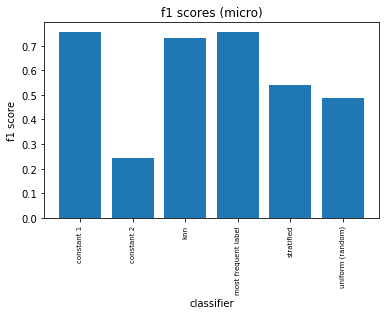

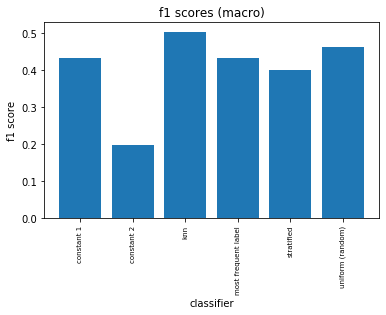

In [ ]:
plot_bar_chart(fmicro, 'f1 scores (micro)', 'classifier', 'f1 score', 2)
plot_bar_chart(fmacro, 'f1 scores (macro)', 'classifier', 'f1 score', 2)

### **Πίνακας μεταβολής της μετρικής f1 πριν και μετά τη βελτιστοποίηση των ταξινομητών**

In [ ]:
comp_df = pd.DataFrame(comp_df_data)
comp_df

,Classifier,F1 Micro (before),F1 Micro (after),F1 Macro (before),F1 Macro (after)
0,uniform (random),0.486486,0.486486,0.461303,0.461303
1,constant 1,0.756757,0.756757,0.430769,0.430769
2,constant 2,0.243243,0.243243,0.195652,0.195652
3,most frequent label,0.756757,0.756757,0.430769,0.430769
4,stratified,0.675676,0.540541,0.588889,0.398086
5,knn,0.540541,0.729730,0.350877,0.502688


### **Σχολιασμός**

Μετά τη βελτιστοποίηση με τη στρατηγική PCA παρατηρούμε για τους ταξινομητές ως προς τις **μετρικές F1 Micro και F1 Macro** από τα bar plots και τον παραπάνω συγκεντρωτικό πίνακα:
* Δεν παρατηρείται βελτίωση των μετρικών για τους dummy ταξινομητές γεγονός που εξηγείται καθώς η επίδοσή τους δεν επηρεάζεται από την αρχιτεκτονική προεπεξεργασίας των δεδομένων.
*  Οι τιμές των μετρικών για τον Constant 2 παραμένουν οι μικρότερες, κάτι που είναι λογικό αφού δε μεταβάλλεται η αναλογία των δειγμάτων κλάσης 2.
*   Ο kNN προσεγγίζει τη μέγιστη τιμή της μετρικής F1 Micro και εμφανίζει τη μέγιστη τιμή για τη μετρική F1 Macro.





